In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import RFE
import lightgbm as lgb
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [2]:
df= pd.read_csv('./CSVs/Cleaned_df.csv')

In [3]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,...,area_name_san_blas,area_name_san_fernando_de_henares,area_name_tetuan_de_las_victorias,area_name_usera,area_name_vicalvaro,area_name_villa_de_vallecas,area_name_villaverde,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour
0,4.0,3.0,1,1.0,1,0,2,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,4.0,4.0,0,2.0,1,1,1,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,4.0,3.0,0,9.0,1,0,6,2.0,3.0,5.0,...,0,0,0,1,0,0,0,0,0,1
3,4.0,3.0,0,1.0,1,1,3,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,4.0,4.0,1,1.0,1,0,4,1.5,2.0,3.0,...,0,0,0,0,0,0,0,0,0,1


# KBest: Chi-Square

## Area_name

In [6]:
X = df[['area_name_arganzuela', 'area_name_barajas_de_madrid', 'area_name_boadilla_del_monte', 'area_name_carabanchel', 'area_name_chamartin', 'area_name_chamberi', 'area_name_city_center', 'area_name_ciudad_lineal', 'area_name_coslada', 'area_name_el_pardo', 'area_name_fuencarral_el_pardo', 'area_name_hortaleza', 'area_name_las_matas', 'area_name_las_tablas','area_name_latina','area_name_leganes','area_name_madrid', 'area_name_majadahonda', 'area_name_moncloa_aravaca', 'area_name_moratalaz', 'area_name_pinar_de_chamartin', 'area_name_pozuelo_de_alarcon', 'area_name_puente_de_vallecas', 'area_name_retiro', 'area_name_salamanca', 'area_name_san_blas', 'area_name_san_fernando_de_henares', 'area_name_tetuan_de_las_victorias', 'area_name_usera', 'area_name_vicalvaro', 'area_name_villa_de_vallecas', 'area_name_villaverde']].copy() #independent columns
y = df['price'].copy()    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                           Specs        Score
25            area_name_san_blas  2078.425402
24           area_name_salamanca  1185.200440
6          area_name_city_center  1157.898224
16              area_name_madrid   968.042695
31          area_name_villaverde   877.061216
22  area_name_puente_de_vallecas   780.090115
23              area_name_retiro   769.099136
14              area_name_latina   763.424443
28               area_name_usera   762.603878
7        area_name_ciudad_lineal   725.269925


## Amenities

In [7]:
X = df[['check_in_24h', 'air_conditioning', 'high_end_electronics', 'bbq', 'balcony', 'nature_and_views', 'bed_linen', 'breakfast', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'child_friendly', 'parking', 'host_greeting', 'internet', 'long_term_stays', 'pets_allowed', 'private_entrance', 'smoking_allowed']].copy() #independent columns
y = df['price'].copy()    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Specs        Score
13        child_friendly  1683.564792
1       air_conditioning  1558.077619
2   high_end_electronics  1519.640748
9         coffee_machine  1400.518232
10        cooking_basics  1174.781801
17       long_term_stays  1095.461281
7              breakfast   931.420967
20       smoking_allowed   927.173635
4                balcony   876.609404
0           check_in_24h   854.063123


## Host_Verifications

In [8]:
X = df[['email', 'facebook', 'government', 'external_verifications', 'manual', 'phone', 'reviews', 'selfie']].copy() #independent columns
y = df['price'].copy()    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print 4 best features

      Specs       Score
4    manual  844.482210
7    selfie  798.648772
6   reviews  726.845081
1  facebook  591.883187


## Everything except for ones above

In [9]:
X = df[['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews_ltm', 'review_scores_cleanliness', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification', 'host_for', 'check_in_24h', 'air_conditioning', 'high_end_electronics', 'balcony', 'breakfast', 'coffee_machine', 'cooking_basics', 'child_friendly', 'long_term_stays', 'smoking_allowed', 'facebook', 'manual','reviews', 'selfie', 'host_response_time_within_a_day', 'host_response_time_within_a_few_hours', 'host_response_time_within_an_hour', 'room_type_hotel_room', 'room_type_private_room', 'room_type_shared_room', 'bed_type_couch', 'bed_type_futon', 'bed_type_pull_out_sofa', 'bed_type_real_bed', 'cancellation_policy_moderate', 'cancellation_policy_strict_14_with_grace_period', 'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60', 'area_name_city_center', 'area_name_ciudad_lineal', 'area_name_latina', 'area_name_madrid', 'area_name_puente_de_vallecas', 'area_name_retiro', 'area_name_salamanca', 'area_name_san_blas', 'area_name_usera', 'area_name_villaverde']].copy() #independent columns
y = df['price'].copy()    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 30 best features

                                  Specs         Score
15                       maximum_nights  3.914360e+10
3                   host_listings_count  6.947369e+05
22                             host_for  5.856590e+05
16                     availability_365  1.664129e+05
13                         extra_people  5.482247e+04
17                number_of_reviews_ltm  5.333387e+04
14                       minimum_nights  3.353003e+04
6                          accommodates  1.005550e+04
41               room_type_private_room  6.757180e+03
9                                  beds  5.980833e+03
12                      guests_included  5.214722e+03
8                              bedrooms  3.015230e+03
42                room_type_shared_room  2.734211e+03
10                     security_deposit  2.200268e+03
49  cancellation_policy_super_strict_30  2.088087e+03
58                   area_name_san_blas  2.078425e+03
40                 room_type_hotel_room  1.825135e+03
30                       chi

# ExtraTrees Classifier

availability_365                                   0.069901
number_of_reviews_ltm                              0.059552
host_for                                           0.055878
host_listings_count                                0.052945
accommodates                                       0.043754
minimum_nights                                     0.041546
maximum_nights                                     0.039961
beds                                               0.038950
extra_people                                       0.037172
review_scores_cleanliness                          0.032774
bathrooms                                          0.029116
bedrooms                                           0.028473
guests_included                                    0.026093
smoking_allowed                                    0.018818
host_identity_verified                             0.018269
instant_bookable                                   0.018073
host_acceptance_rate                    

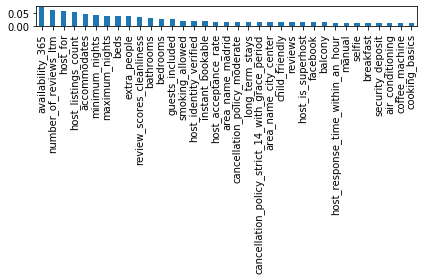

In [11]:
X = df[['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews_ltm', 'review_scores_cleanliness', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification', 'host_for', 'check_in_24h', 'air_conditioning', 'high_end_electronics', 'balcony', 'breakfast', 'coffee_machine', 'cooking_basics', 'child_friendly', 'long_term_stays', 'smoking_allowed', 'facebook', 'manual','reviews', 'selfie', 'host_response_time_within_a_day', 'host_response_time_within_a_few_hours', 'host_response_time_within_an_hour', 'room_type_hotel_room', 'room_type_private_room', 'room_type_shared_room', 'bed_type_couch', 'bed_type_futon', 'bed_type_pull_out_sofa', 'bed_type_real_bed', 'cancellation_policy_moderate', 'cancellation_policy_strict_14_with_grace_period', 'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60', 'area_name_city_center', 'area_name_ciudad_lineal', 'area_name_latina', 'area_name_madrid', 'area_name_puente_de_vallecas', 'area_name_retiro', 'area_name_salamanca', 'area_name_san_blas', 'area_name_usera', 'area_name_villaverde']].copy() #independent columns
y = df['price'].copy()    #target column i.e price range
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='bar')
print(feat_importances.nlargest(35)) 
plt.tight_layout()
plt.show()

# Train-Test Split

In [4]:
splitter = train_test_split
"-----------------------"

df_train, df_test = splitter(df, test_size = 0.3, random_state = 42)
print("Dataset shape: {shape}".format(shape = df_train.shape))
print("Dataset shape: {shape}".format(shape = df_test.shape))

Dataset shape: (15283, 113)
Dataset shape: (6550, 113)


In [5]:
target = 'price'
X_train= df_train.drop('price',axis=1)
y_train = df_train[target]

X_test= df_test.drop('price',axis=1)
y_test = df_test[target]

# Standardizing and Normalizing

In [6]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

In [7]:
scaler = MinMaxScaler()
X_trains = scaler.fit_transform(X_train_sc)
X_tests = scaler.fit_transform(X_test_sc)
X_train = pd.DataFrame(X_trains, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(X_tests, index=X_test.index, columns=X_test.columns)

In [8]:
X_train.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,...,area_name_san_blas,area_name_san_fernando_de_henares,area_name_tetuan_de_las_victorias,area_name_usera,area_name_vicalvaro,area_name_villa_de_vallecas,area_name_villaverde,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour
3693,1.0,1.0,0.0,0.001898,1.0,0.0,0.052632,0.090909,0.111111,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6385,1.0,1.0,0.0,0.009488,1.0,1.0,0.000000,0.090909,0.111111,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4029,1.0,1.0,0.0,0.001898,1.0,0.0,0.157895,0.090909,0.111111,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7220,1.0,1.0,0.0,0.091082,1.0,0.0,0.263158,0.090909,0.222222,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3995,1.0,1.0,0.0,0.001898,1.0,0.0,0.052632,0.090909,0.111111,0.02,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# PCA
We decided to see what was the optimum size of components in PCA to check how many features we needed from the components.

Text(0.5, 0.85, '80% cut-off threshold')

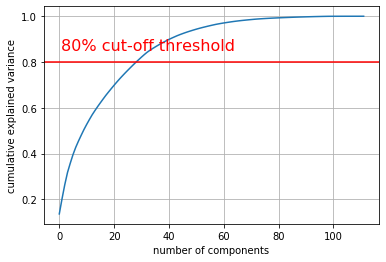

In [9]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

In [10]:
pca = PCA(0.9)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.n_components

0.9

In [12]:
print(len(pca.components_))

42


In [13]:
print(pca.components_)

[[ 0.02759512  0.04744489  0.12845899 ... -0.03844342 -0.03404557
   0.09200792]
 [-0.00778678 -0.04135748  0.05513266 ...  0.04417015  0.05721555
  -0.10440051]
 [-0.01160119 -0.0813247   0.03117316 ...  0.06491163  0.10254621
  -0.17399278]
 ...
 [ 0.00921362 -0.01612468  0.00923577 ...  0.00111769  0.00862568
  -0.00285438]
 [ 0.02165702 -0.00728705  0.01088701 ... -0.01636334  0.0101418
   0.01558877]
 [-0.12388666 -0.89585244  0.07118465 ... -0.22633206  0.02559674
   0.08858541]]


In [14]:
print(pca.explained_variance_)

[1.1369408  0.55036388 0.51292604 0.44414489 0.33528275 0.31228568
 0.26651029 0.22768917 0.21309933 0.20571822 0.1879583  0.17798224
 0.17074362 0.15229387 0.14575718 0.13964202 0.13636182 0.13410594
 0.12432182 0.12244469 0.12001842 0.11603982 0.11321121 0.10755759
 0.10530301 0.10190406 0.1002637  0.0983582  0.09689311 0.09209577
 0.09152269 0.08822025 0.08295513 0.07087058 0.0650241  0.06029158
 0.06001519 0.05746778 0.05380326 0.0524487  0.04988713 0.04678429]


In [15]:
cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

print(cum_explained_var)

[0.1366079441389375, 0.20273634605634094, 0.2643664437361669, 0.31773221294322834, 0.35801776480950204, 0.3955401268256026, 0.42756239483917574, 0.4549201507773446, 0.4805248798177541, 0.505242739813864, 0.5278266748645445, 0.5492119467542139, 0.5697274693385692, 0.58802618202053, 0.605539484809884, 0.6223180270493701, 0.6387024400032821, 0.6548158005488848, 0.669753560107471, 0.6844657754433774, 0.6988864645323798, 0.7128291091651082, 0.7264318846755581, 0.7393553557313164, 0.7520079304424739, 0.7642521074318176, 0.7762991885005985, 0.7881173158559973, 0.7997594076042658, 0.8108250798177988, 0.8218218932947318, 0.8324219056608186, 0.842389292869407, 0.850904673913883, 0.8587175767850502, 0.8659618492567759, 0.8731729123779616, 0.8800778942096799, 0.8865425692362596, 0.8928444884820087, 0.8988386244279397, 0.9044599425397825]


# LDA
We run an LDA for the same reasons

In [16]:
clf = LDA()
clf.fit(X_train, y_train)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

# Feature Selection: LightGBM RFE

In [17]:
gbm = lgb.LGBMRegressor()
gbm.fit(X_train, y_train)
gbm.booster_.feature_importance()
fea_imp_ = pd.DataFrame({'cols':X_train.columns, 'fea_imp':gbm.feature_importances_})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

,cols,fea_imp
27,host_for,306
16,availability_365,284
3,host_listings_count,217
13,extra_people,215
17,number_of_reviews_ltm,174
...,...,...
98,area_name_pozuelo_de_alarcon,1
78,area_name_barajas_de_madrid,1
2,host_is_superhost,1
77,area_name_arganzuela,1


In [18]:
rfe = RFE(gbm, 10)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
fea_rank_ = pd.DataFrame({'cols':X_train.columns, 'fea_rank':rfe.ranking_})
fea_rank_.loc[fea_rank_.fea_rank > 0].sort_values(by=['fea_rank'], ascending = True)

[False False False  True False False  True False  True  True False False
  True  True False  True  True  True False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


,cols,fea_rank
17,number_of_reviews_ltm,1
15,maximum_nights,1
13,extra_people,1
12,guests_included,1
9,beds,1
...,...,...
95,area_name_moncloa_aravaca,99
37,sent_id,100
40,high_end_electronics,101
64,accessible,102


In [19]:
features = fea_rank_.sort_values(by=['fea_rank'], ascending = True)

In [20]:
features = features[:24]

In [21]:
features.columns

Index(['cols', 'fea_rank'], dtype='object')

In [22]:
features.drop('fea_rank', axis=1, inplace=True)

In [23]:
features = features['cols']

In [24]:
features

17      number_of_reviews_ltm
15             maximum_nights
13               extra_people
12            guests_included
9                        beds
16           availability_365
8                    bedrooms
27                   host_for
3         host_listings_count
6                accommodates
14             minimum_nights
7                   bathrooms
61                     secure
11               cleaning_fee
67     room_type_private_room
1        host_acceptance_rate
50                   elevator
49                white_goods
0          host_response_rate
10           security_deposit
31                 government
23        review_scores_value
101       area_name_salamanca
102        area_name_san_blas
Name: cols, dtype: object

# Creating a new CSV with only the features needed

In [28]:
df= pd.read_csv('./CSVs/Cleaned_df.csv')

In [30]:
mod= df[['maximum_nights','extra_people','guests_included','beds','availability_365','accommodates','bedrooms','host_listings_count','host_for','number_of_reviews_ltm','minimum_nights','bathrooms','secure','cleaning_fee','room_type_private_room','host_acceptance_rate','elevator','white_goods','host_response_rate','security_deposit','government','review_scores_value','area_name_salamanca','area_name_san_blas','price']]
mod.head()

,maximum_nights,extra_people,guests_included,beds,availability_365,accommodates,bedrooms,host_listings_count,host_for,number_of_reviews_ltm,...,host_acceptance_rate,elevator,white_goods,host_response_rate,security_deposit,government,review_scores_value,area_name_salamanca,area_name_san_blas,price
0,365,15.0,2,0.0,77,2,1.0,1.0,4010,14,...,3.0,1.0,1.0,4.0,0.0,1.0,10.0,0,0,70.0
1,40,8.0,1,1.0,200,1,1.0,2.0,3699,0,...,4.0,1.0,1.0,4.0,0.0,1.0,9.0,0,0,17.0
2,730,10.0,1,5.0,249,6,3.0,9.0,3703,0,...,3.0,1.0,1.0,4.0,1.0,1.0,9.0,0,0,50.0
3,730,10.0,2,1.0,364,3,0.0,1.0,3661,7,...,3.0,1.0,1.0,4.0,1.0,1.0,10.0,0,0,89.0
4,10,0.0,4,3.0,322,4,2.0,1.0,3661,16,...,4.0,1.0,1.0,4.0,1.0,0.0,10.0,0,0,115.0


In [31]:
mod.to_csv('./CSVs/Modelling.csv',index=False)

Camila Barbagallo, Ryan Daher, Rocío González Lantero, Paula García